# Visualisation du temps de parcours de certains algorithmes

Pour représenter l'efficacité des algorithmes vus en cours, nous utilisons le module `pyplot` de la librairie `matplotlib`. 
Celui-ci nous permet de représenter graphiquement la fonction `y` en fonction de `x` à l'aide de la commande suivante :
`plt.plot(x,y)`, dans la mesure où les deux objets étudiés sont des listes de taille égale.

Nous pouvons donc créer comme instance une liste `x` de taille variable allant de $1$ $N$ sur laquelle nous appliquerons notre algorithme. Pour chaque taille de la liste, on mesure le temps de calcul à l'aide de la fonction `time`, que nous enregistrerons dans la liste `y`.   


In [2]:
from time import time
from random import randrange
import matplotlib.pyplot as plt

### Introduction Fibonacci

In [ ]:
def fib_r(n):
    '''
    calcule le n- ieme nombre de Fibonacci
    de manière résursive
    '''
    # TO DO & fib_r(36)
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_r(n-1) + fib_r(n-2)

print(fib_r(39))
    
# faire tourner fib()


### Temps de calcul opération simple

In [ ]:
# Exemple time basique
# exemples avec print(), 1+1, différentes opérations
# Fibonacci aussi

t1 = time()
x = 3
t2 = time()

print(f"L'opération a duré {t2-t1} secondes")

In [ ]:
t = []
for i in range(0, 1000, 1):
    t1 = time()
    x = 3
    t2 = time()
    t.append(t2-t1)
    
plt.plot(t)
plt.xlabel("Itération")
plt.ylabel("Temps [s]")
plt.title("Temps écoulé pour effectuer une opération simple")
plt.show()

### Temps de calcul Fibonacci

In [ ]:
def fib_i(n):
    '''
    calcule le n- ieme nombre de Fibonacci
    de manière itérative
    '''
    fib_old = 0
    fib_new = 1
    for i in range (2 , n+1):
        fib_old , fib_new = fib_new , fib_old + fib_new
    if n == 0:
        return fib_old
    return fib_new


In [ ]:

t_i = []
t_r = []
n = 30
taille = list(range(0,n))
for i in taille:
    t0 = time()
    fib_i(i)
    t1 = time()
    t_i.append(t1-t0)
    t0 = time()
    fib_r(i)
    t1 = time()
    t_r.append(t1-t0)

print(f"Temps de calcul pour les {n} premiers termes de la suite de Fibonacci :\n")
print(f"Temps total itératif: {sum(t_i)} s")
print(f"Temps total résursif: {sum(t_r)} s\n")


In [ ]:
# Représentation graphique :
plt.plot(taille,t_i,'--x')
plt.plot(taille,t_r,'--x')
plt.legend(["Itératif","Récursif"])
plt.xlabel('N')
plt.ylabel('Temps de calcul [s]')
plt.title('Calcul du Ne terme de la suite de Fibonacci')
plt.show()

### Temps de calcul recherche maximum liste

In [3]:
def max_liste (L):
    n = len (L)
    max_L = L[0]
    for i in range (1, n):
        if L[i] > max_L :
            max_L = L[i]
    return max_L


L = [1,2,3,4,10]

print(max_liste(L))

10


In [ ]:
# on change la taille de la liste
# implémentation faite sur le slide



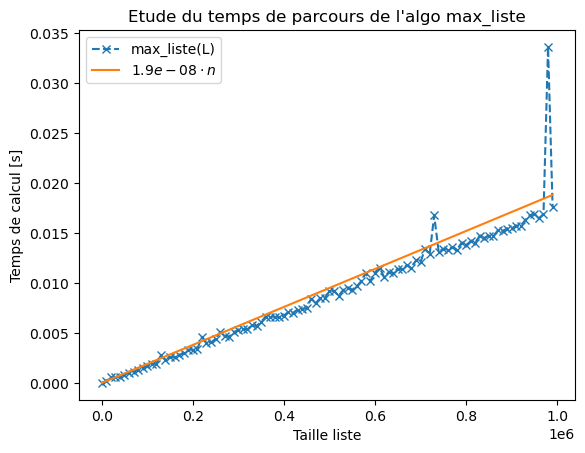

In [4]:
# représentation graphique 
t = []
n = 1000000
dn = 10000
taille = list(range(1,n,dn))
# Il s'agit d'une liste ayant comme éléments 
# les tailles des listes considérées (1 -> N)
C = 0.19e-7
ref = [C*x for x in taille]
for ta in taille:
    # on crée une liste de taille "ta" contenant
    # des éléments aléatoires
    L = []
    for i in range(ta) :
        L.append(randrange(10000))
    t0 = time()
    m = max_liste(L)
    t1 = time()
    t.append(t1-t0)

    
plt.plot(taille,t,'--x', label = "max_liste(L)")
plt.plot(taille,ref,'-',label= f'${C}\cdot n$')
plt.xlabel('Taille liste')
plt.ylabel('Temps de calcul [s]')
plt.title("Etude du temps de parcours de l'algo max_liste")
plt.legend()
#plt.savefig('max1_linear')
plt.show()

### Max deux nombres (brute force)

In [5]:
def max_somme(L):
    n = len(L)
    max_s = L[0] + L[1]
    for i in range(n):
        for j in range (i+1, n):
            if L[i] + L[j] > max_s :
                max_s = L[i] + L[j]
    return max_s

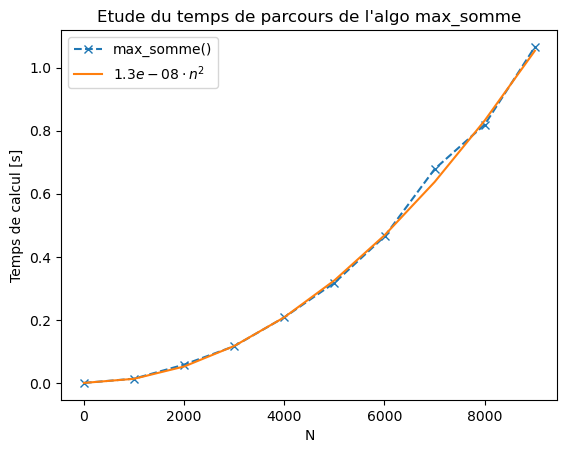

In [6]:
n = 10000
dn = 1000
nrange = list(range(2,n,dn))

C = 0.13e-7
ref = [C*x*x for x in nrange]
t = []
for i in nrange:
    L = []
    for j in range(i):
        L.append(randrange(10000))
    t0 = time()
    max_somme(L)
    t1 = time()
    t.append(t1-t0)
    
plt.plot(nrange,t,'--x', label = 'max_somme()')
plt.plot(nrange, ref, '-', label= f'${C}\cdot n^2$')
plt.xlabel('N')
plt.ylabel('Temps de calcul [s]')
plt.title("Etude du temps de parcours de l'algo max_somme")
plt.legend()
#plt.savefig('max2_quad')
plt.show()

### Max deux nombres (linéaire)

In [7]:
from time import time
from random import randrange
import matplotlib.pyplot as plt

def max_somme_lineaire(L):
    # implémentation algorithme
    # linéaire
    max1 = max_liste(L)     # on a prouvé que c'est linéaire
    L.remove(max1)          # opération linéaire (ovir liste contigue)
    max2 = max_liste(L)     # linéaire
    return max1 + max2      # temps constant

L = [1,2,3,4,5,6,7,88]
print(max_somme_lineaire(L))


95


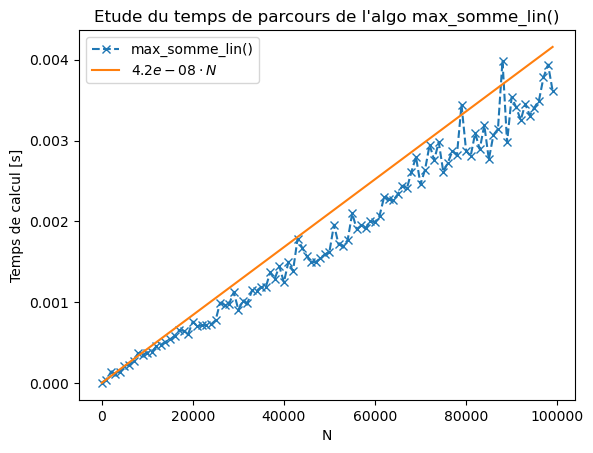

In [8]:
n = 100000
dn = 1000
nrange = list(range(2,n,dn))

t = []
C = 0.42e-7
ref = [C*x for x in nrange]
for i in nrange:
    L = []
    for j in range(i):
        L.append(randrange(10000))
    t0 = time()
    max_somme_lineaire(L)
    t1 = time()
    t.append(t1-t0)
    
plt.plot(nrange,t,'--x', label= 'max_somme_lin()')
plt.plot(nrange,ref,'-', label= f'${C}\cdot N$')
plt.xlabel('N')
plt.ylabel('Temps de calcul [s]')
plt.title("Etude du temps de parcours de l'algo max_somme_lin()")
plt.legend()
#plt.savefig('max2_lin')
plt.show()

### Comparaison

In [10]:
from time import time
from random import randrange
import matplotlib.pyplot as plt


n = 10000
dn = 1000
nrange = list(range(3,n,dn))

t = []
t2 = []
for i in nrange:
    L = []
    for j in range(i):
        L.append(randrange(100))
    t0 = time()
    max_somme_lineaire(L)
    t1 = time()
    t.append(t1-t0)
    
    tt0 = time()
    max_somme(L)
    tt1 = time()
    t2.append(tt1-tt0)

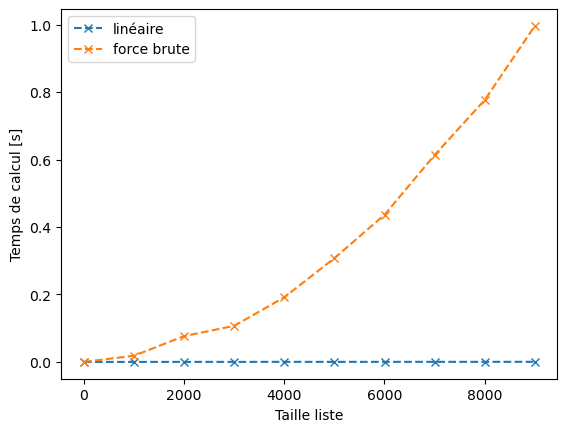

In [13]:
plt.plot(nrange,t,'--x', label="linéaire")
plt.plot(nrange,t2,'--x', label = "force brute")
plt.xlabel('Taille liste')
plt.ylabel('Temps de calcul [s]')
plt.savefig('max2_comp')
plt.legend()
plt.show()

### Plot complexité

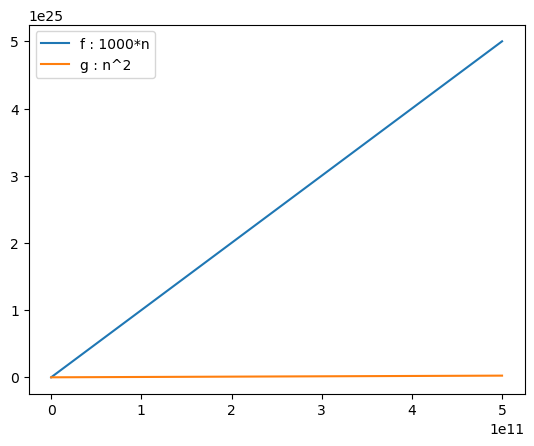

In [23]:
import matplotlib.pyplot as plt 
from math import sqrt
n = [] 
f = [] 
g = [] 
for i in range(1,1000000000000, 50000000000000): 
    n.append(i) 
    f.append(100000000000*i) 
    g.append(i*i) 
    
plt.plot(n, f, label = 'f : 1000*n') 
plt.plot(n, g, label = 'g : n^2') 
plt.legend() 
#plt.xlim([25, 50])
#plt.ylim([25, 50])
plt.show()